# Data Fundamentals (H)
John H. Williamson -- Session 2020/2021

----

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**



---

## Lab 2: **Assessed**
# Numerical arrays and vectorized computation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

**This exercise is assessed**. Make sure you upload your solution by the deadline. Submit only the `.ipynb` file.


### References
If you are stuck, the following resources are helpful:

* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy)
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)


## Purpose of this lab
This lab should help you:
* understand floating point representations
* understand how roundoff errors occur and how you can control them
* work with higher rank tensors, selecting the attributes you want to work with
* understand how to do simple operations in a vectorised manner

Note: this lab requires solving puzzles which require that you understand the course material. Very little code is required to get the correct solutions.


In [1]:
import sys, os
python_path = sys.executable

## custom utils

## uncomment and run the line below ONCE if you get an error about jhwutils
## then RESTART THE KERNEL (Kernel/Restart)

!{python_path} -m pip --no-cache install --user -U https://github.com/johnhw/jhwutils/zipball/master   

# comment this line again before submitting!

  Created wheel for jhwutils: filename=jhwutils-1.0-py3-none-any.whl size=31784 sha256=256519cfafac8c27362e35bc2507bb691869db3dc3b2dea477310197f5872abb
  Stored in directory: /private/var/folders/nd/xt9sb0wj16vc72g009fvsc5h0000gn/T/pip-ephem-wheel-cache-k65aht40/wheels/2b/c0/bb/e488c0c509d2400eef5593a732c1c19a1170128cf068ee2d7d
Successfully built jhwutils
  Attempting uninstall: jhwutils
    Found existing installation: jhwutils 1.0
    Uninstalling jhwutils-1.0:
      Successfully uninstalled jhwutils-1.0


In [2]:
# Standard imports
# Make sure you run this cell!
# NumPy
import numpy as np  
np.set_printoptions(suppress=True)

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

from jhwutils.checkarr import array_hash, check_hash
from jhwutils.float_inspector import print_float_html
import jhwutils.image_audio as ia
import jhwutils.tick as tick

import lzma, base64
exec(lzma.decompress(base64.b64decode(b'/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AHWARFdAAUaCmNWCuiTCXe8bHWT/WeqghymfBRQKyklXJ3lgDWHk34myezvldkgSu3Adiur0vA+OkDfUwiMWzEclOxunCssCtgpVM94TwtylLQC9aX0APwnuNk2VBPkVpf3otXT04I1pElMWNdSgqgJ9/PqMJhdhfDr3Wrs/a/pRN/AOd+rZawioudIbGRTYZgWPHcqPLImmS2EO0Hbkc7kRAS3Nr9JkELrRMkejvVMnGgu+b1m4uXv6trDURkPrMO7HCVcO5FcMx1FURc+hNcKRmmBp1mCuW4iop6qRAMNnAur/spBmfuw+lbJkxOoIXMwrRuEXa6bnJz53WQnloXvzbWW5hqEtbPpSHPLPccxaiU5yPAKYAAAAADqkqJjsFbfFwABrQLXAwAA9LrSpbHEZ/sCAAAAAARZWg==')))

print("Everything imported OK")

Everything imported OK


/Users/stovifo/opt/anaconda3/lib/python3.8/site-packages/IPython/kernel/__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


## Precision
Want to change precsion of number printing in NumPy?

* `np.set_printoptions(precision=30)` will show the numbers in full
* `np.set_printoptions(precision=3)` will show three decimal places, etc.


# 1. Financial misconduct

You have been asked to verify the computation of some financial predictive models. These models produces a sequence of updates to the value of a product. The product updates are mainly of two types:
* **large deposits**, representing inflows of new cash, often up into the billions of pounds
* **small returns** from high-frequency trading activity

The simulator produces **two** model outputs from two distinct models `a` and `b` at each time step, which provide very similar estimates of the value of these updates. Sometimes these are equal to each other.

You are asked to write code that will produce:

* an estimate of the total value of a product over some series
* the total difference between two different product models, both of which are very similar.

You are given the existing code below, which is supposed to compute and return:

* the sum of the `a` updates (i.e. total value of `a`)
* the accumulated difference between the `a` and `b` products.

However, the result is very inaccurate when tested. Modify this code to be more accurate. Do NOT use NumPy, or *any* other external module to improve your calculation. Use floating point, regardless of the fact that floating point is not appropriate for financial data.

The errors should be less than 0.5 for the `a` sum and less than 1e-10 for the difference in predictions.

In [3]:
class Simulator: # we use a class just to hold variables between calls
    def __init__(self):
        # initialise accumulators
        self.a_sum = 0
        self.b_sum = 0
        
    def update(self, a, b):
        # increment
        self.a_sum += a
        self.b_sum += b
       
    def results(self):
        # return a  pair of results
        return self.a_sum, self.a_sum - self.b_sum
        

In [4]:
a_error, d_error = simulate(Simulator())
# bad result!
print(f"Error in a_sum is {a_error} and {d_error} in d_sum")

Error in a_sum is 13.7734375 and 4.101232676410264e-08 in d_sum


Copy and paste the `Simulator` into the cell below and modify it:

In [297]:
# YOUR CODE HERE

class Simulator: # we use a class just to hold variables between calls
    def __init__(self):
        # initialise accumulators
        self.a_sum = 0
        self.b_sum = 0
        self.a_b_difference = 0
        
    def update(self, a, b):
        # increment
        if a < 150:
            self.b_sum = self.b_sum + a
        else:
            self.a_sum = self.a_sum + b
        self.a_b_difference = self.a_b_difference + (a - b)
       
    def results(self):
        # return a  pair of results
        return self.a_sum + self.b_sum, self.a_b_difference
        

In [298]:
    
a_error, d_error = simulate(Simulator())
print(f"Error in a_sum is {a_error} and {d_error} in d_sum")

Error in a_sum is 0.3515625 and 0.0 in d_sum


In [299]:
with tick.marks(2):
    assert(a_error<2.0)

In [300]:
with tick.marks(2):
    assert(a_error<0.5)

In [301]:
with tick.marks(2):
    assert(d_error<1e-10)

In [302]:
with tick.marks(2):
    assert(d_error<1e-12)

# 2. Debugging the dump [1 hour]

Scenario: In your first day in a new post in the IT team in a cooking company, you are provided with the a portion of a memory dump of a process that was running an important simulation of cake baking processes. Unfortunately, the system crashed half way through and the raw memory dump is all that is left. You need to extract the relevant data so that the simulation can be restarted. 

You know the data is stored as a numerical array, so it has some known structure. You don't know the dtype or shape of the array, or where it starts or ends in the memory dump, however.

**This is a puzzle which will require careful thinking, but very little code to be written. Note that you can write code to solve this, but you can also solve it by hand**

In [11]:
# read the data in
with open("data/crash_bytes_2021.dump", "rb")  as f:
    crash_dump = f.read()

In [12]:
# the raw memory dump, in hex. This isn't too useful...
# but align, group, offset might be helpful to tweak...

def print_hex(x, align=20, group=5, offset=0):
    for i, byte in enumerate(x[offset:]):                
        print("%02X" % byte, end="\n" if i%align==align-1 else "  " if i%group==group-1 else " ")            
    
print_hex(crash_dump)

C7 7E 7E 00 DB  09 22 9C 82 8E  ED 00 00 00 00  00 E0 65 40 00
00 00 00 00 00  45 40 00 00 00  00 00 E0 65 40  00 00 00 00 00
20 67 40 00 00  00 00 00 00 47  40 00 00 00 00  00 20 67 40 00
00 00 00 00 60  68 40 00 00 00  00 00 80 47 40  00 00 00 00 00
60 68 40 00 00  00 00 00 A0 69  40 00 00 00 00  00 80 43 40 00
00 00 00 00 A0  69 40 00 00 00  00 00 E0 6A 40  00 00 00 00 00
80 4A 40 00 00  00 00 00 E0 6A  40 00 00 00 00  00 20 6C 40 00
00 00 00 00 00  45 40 00 00 00  00 00 20 6C 40  00 00 00 00 00
E0 65 40 00 00  00 00 00 80 43  40 00 00 00 00  00 E0 65 40 00
00 00 00 00 20  67 40 00 00 00  00 00 00 47 40  00 00 00 00 00
20 67 40 00 00  00 00 00 60 68  40 00 00 00 00  00 80 49 40 00
00 00 00 00 60  68 40 00 00 00  00 00 A0 69 40  00 00 00 00 00
80 48 40 00 00  00 00 00 A0 69  40 00 00 00 00  00 E0 6A 40 00
00 00 00 00 80  4B 40 00 00 00  00 00 E0 6A 40  00 00 00 00 00
20 6C 40 00 00  00 00 00 00 45  40 00 00 00 00  00 20 6C 40 00
00 00 00 00 E0  65 40 00 00 00  00 00 00 47 40  00 00 0

### What you know
All you have is the block of raw data you can see above.  You know the array is in there, but not exactly where it starts or stops.  The header information is gone, so there is no striding information/dope vector to go by.

* You know that the first and last column of the data are the equal on every row.              
* You also know that all values are finite, positive and represent whole numbers.
* You can assume the data is some form of IEEE 754, though you do not know what specific type.
* The data starts on a byte boundary.

**This is sufficient information to solve the whole puzzle**

### Task
Recover the data, formatted correctly, and store it in the variable `recovered_array`. 

* This will take some trial and error (although there *is* a relatively fast way to do it).
      

* You can convert the data to a NumPy array like this:
`np.frombuffer(bytes, dtype, count, offset)`
* `bytes` the data to decode, as raw bytes
* `dtype` the datatype of the data to decode
* `count` the number of **elements** in the array
* `offset` **in bytes** to start recovering data
    

In [279]:
# A wrong example:
# try and read 18 words from offset 0
# reshape to a 6,3 array
# this clearly isn't right, as you will see
np.frombuffer(crash_dump, dtype=np.float64, count=18, offset=0).reshape(6,3)

array([[ -57,  126,  126],
       [   0,  -37,    9],
       [  34, -100, -126],
       [-114,  -19,    0],
       [   0,    0,    0],
       [   0,  -32,  101]], dtype=int8)

* A hint: you can show how any NumPy memory will appear in memory in hex using `tobytes()` -- see the example below. Also, remember you need to infer the *shape* of the array.

In [107]:
# create a simple array, and then get the raw bytes and print them
print_hex(np.array([[1.0, 2.0, 3.0], 
                    [4.0, 0.0, 0.0]], dtype=np.float64).tobytes())

00 00 00 00 00  00 F0 3F 00 00  00 00 00 00 00  40 00 00 00 00
00 00 08 40 00  00 00 00 00 00  10 40 00 00 00  00 00 00 00 00
00 00 00 00 00  00 00 00 

In [280]:
# YOUR CODE HERE

recovered_array = np.frombuffer(crash_dump, dtype=np.int8, count=414, offset = 8).reshape(69,6)
print(recovered_array)

[[-126 -114  -19    0    0    0]
 [   0    0  -32  101   64    0]
 [   0    0    0    0    0   69]
 [  64    0    0    0    0    0]
 [ -32  101   64    0    0    0]
 [   0    0   32  103   64    0]
 [   0    0    0    0    0   71]
 [  64    0    0    0    0    0]
 [  32  103   64    0    0    0]
 [   0    0   96  104   64    0]
 [   0    0    0    0 -128   71]
 [  64    0    0    0    0    0]
 [  96  104   64    0    0    0]
 [   0    0  -96  105   64    0]
 [   0    0    0    0 -128   67]
 [  64    0    0    0    0    0]
 [ -96  105   64    0    0    0]
 [   0    0  -32  106   64    0]
 [   0    0    0    0 -128   74]
 [  64    0    0    0    0    0]
 [ -32  106   64    0    0    0]
 [   0    0   32  108   64    0]
 [   0    0    0    0    0   69]
 [  64    0    0    0    0    0]
 [  32  108   64    0    0    0]
 [   0    0  -32  101   64    0]
 [   0    0    0    0 -128   67]
 [  64    0    0    0    0    0]
 [ -32  101   64    0    0    0]
 [   0    0   32  103   64    0]
 [   0    

In [281]:
# test the shape
with tick.marks(5):        
    assert(check_hash(recovered_array.shape, ((2,), 126.0)))

Got hash (2,), 262.5 but expected (2,), 126.0


AssertionError: 

In [282]:
# test if the result is correct   
with tick.marks(8):        
    print(array_hash(recovered_array)[1])
    assert(np.allclose(array_hash(recovered_array)[1], 733227.1749887485, atol=1e-2, rtol=1e-2))

1466806.412300358


AssertionError: 

# 3. Working with tensors [1 hour]
The file `data/font_sheet.png` contains a number of characters in different fonts. It is an image which consists of the images of each *printable* ASCII character, (characters 32-128) arranged left to right. Each character image is precisely square. 

These are the characters present, in order:

In [58]:
chars = "".join([chr(i) for i in range(32,128)])
print(chars)

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


  
Each font is also stacked left to right, so the image is one *very* long strip of characters. The image is grayscale.

In [59]:
all_fonts = ia.load_image_gray("data/font_sheet.png")
print(all_fonts.shape)

/Users/stovifo/.local/lib/python3.8/site-packages/jhwutils/image_audio.py:42: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = skimage.color.rgb2gray(skimage.io.imread(fname, plugin="pil"))


(1856, 6144)


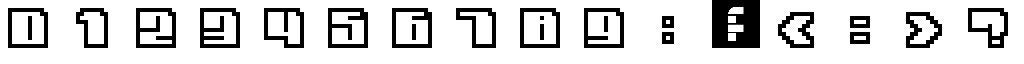

In [19]:
# show a portion of the image
ia.show_image(all_fonts[64:128, 1024:2048])

## Hint

Remember that reshaping an array **does not change its order in memory** -- it just changes the way elements are grouped.

For example, we can see the 2D array
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9],
         [9, 10, 11]]
         
reshaped to a 2x2x3 array will be 

    [
        [
            [1,2,3],
            [4,5,6]
        ],        
        [
            [7,8,9], 
            [9, 10, 11]
        ]
    ]
     
Only the grouping (bracketing) has changed -- the data is in the same order. Look at the figure below for another example:
        

In [20]:
## hint
from jhwutils.matrices import show_boxed_tensor_latex
n = np.arange(36).reshape(2*3, 3*2)
# look at how this reshaping changes from the 2D matrix
# into the 4D tensor -- the **order** of elements in memory
# does not change. Only the **grouping** of elements is changed.
show_boxed_tensor_latex(n, box_rows=False)
show_boxed_tensor_latex(n.reshape(2,3,2,3), box_rows=False)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Tasks
A. Rearrange the image into a tensor called `font_sheet` that is ordered like this:

        (character, rows, cols, font)
        
* Showing the image `font_sheet[33, :, :, 16]` should show the "A" character of the 17th font.
* Showing the image `font_sheet[1, :, :, 10]` should be the "!" character of the 11th font.

In [61]:
# YOUR CODE HERE
font_sheet = ia.load_image_gray("data/font_sheet.png")
font_sheet = font_sheet.reshape(29, 64, 96, 64)
font_sheet = np.einsum('ijkl -> kjli', font_sheet)

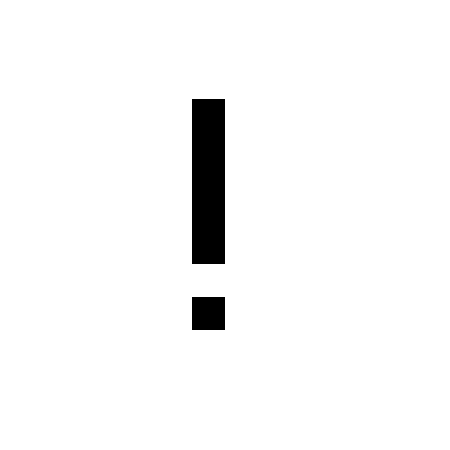

In [62]:
# if your code worked, you should see an ! below
ia.show_image_mpl(font_sheet[1, :, :, 2])

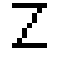

In [35]:
# if your code worked, you should see a gif of letters below
ia.show_gif(font_sheet[33:33+26, :, :, 3], width="20%")

In [36]:
# test shape is correct
with tick.marks(6):        
    assert(check_hash(font_sheet.shape, ((4,), 807.9499472573252)))

In [37]:
# test content is ok
with tick.marks(10):        
    assert(np.allclose(array_hash(font_sheet)[1], 54726526618016.71, atol=1e-2, rtol=1e-2))    

B. Create an array `letter_sample`, which will be a 2D image containing the letter "G" from each of the first sixteen fonts, laid out in a 4x4 grid. The image should be a single 256x256 image which looks like
    
    GGGG
    GGGG
    GGGG
    GGGG
    
but each letter in a different font.

Hint:
* you'll need to slice -- work out how to slice the array correctly
* use einsum if you want to stay sane
* do **not** use a loop
* you may need to do this in two steps

In [48]:
# YOUR CODE HERE
letter_sample = font_sheet[71,:,:,:16].reshape(64,64,4,4)
letter_sample = np.einsum('ijkl -> kilj', letter_sample).reshape(256,256)

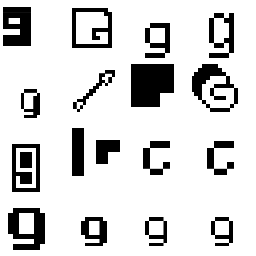

In [49]:
# each character should appear in a different font, in a 4x4 grid of Gs
ia.show_image(letter_sample)

In [50]:

with tick.marks(8):
    assert(check_hash(letter_sample,((256, 256), 1825091045.0371535)))

C. Compute the average representation of the letter "a" by taking the 64x64 median image of the letter `a` across all fonts and store it in `average_a`. That is, we're looking to find the median (use `np.median`) of all the images of an "a", averaging over the fonts -- this should look like a letter A, but rough.
        

In [55]:
# YOUR CODE HERE
average_a = font_sheet[33,:,:,:]
average_a = np.median(average_a, axis = 2)

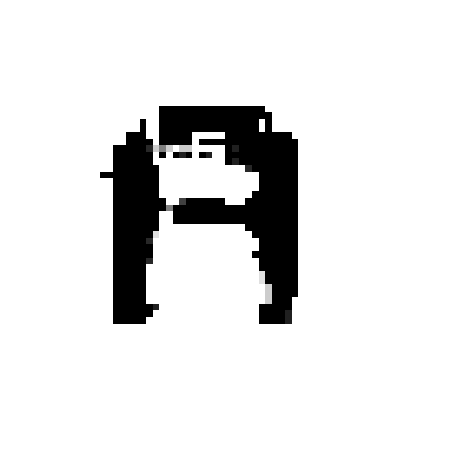

In [56]:
# show the result -- should be a 64x64 image
ia.show_image_mpl(average_a)

In [57]:
with tick.marks(5):    
    assert(check_hash(average_a, ((64, 64), 7464645.161105226)))

# End of assessed portion

----------------------------------

## Extended material

<font color="red"> Material beyond this point is optional. You do not have to attempt it or look at it. There are no marks. 
</font>

## Rendering fonts
Complete the function below. It should render text using the provided font index, and *return* a single array with the text rendered in a horizontal strip. It should use `font_sheet` that you defined earlier. You can assume equal spacing of letters. 

* You can compute the index of the character in the same units as the font sheet using the formula:

      ix = ord(char) - 32
    
Every ASCII character (32-127) should be rendered. Any character that could not be rendered should be rendered as a **blank white** square.    

* It is fine to use a `for` loop to solve this problem

In [ ]:
def render_text(string, font_index):
    """Returns an image with the given string rendered, using the font_index selected.
    Reads characters from font_sheet.
    string: String to be rendered.
    font_index: index of the font to use"""
    pass # you can delete this line
    # YOUR CODE HERE

In [ ]:
# you should be able to read this
ia.show_image(render_text("Can you see this clearly?", 23))

In [ ]:
# this should look the same
ia.show_image(render_text("Can\tyou\nsee\xf5this\x00clearly?", 23))

In [ ]:
ia.show_image(render_text("Data Fundamentals (H)", 1))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test 1", 1), ((64, 384), 269160963.20571893)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test 2", 2),((64, 384), 282670129.18082076)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("Test\n3", 3), ((64, 384), 283057779.18977338)))

In [ ]:
with tick.marks(0):
    assert(check_hash(render_text("\n\tTest\x00\xff4", 4), ((64, 576), 657469474.43368447)))

-----

# Submission instructions

## Before submission

* Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`.
* SAVE THE NOTEBOOK





<div class="alert alert-block alert-danger">
    
### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `<xxx>.ipynb`.

</div>


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Plagiarism will be subject to the Plagiarism Policy. The penalties are severe.